<h1>Solving for the Eigenvalues of the 1D Schrodinger Equation

<h2>$-\frac{ħ^{2}}{2m}\frac{d^{2}ψ(x)}{dx^{2}}+V(x)ψ(x)=Eψ(x)$

<br><br>

Hello Everyone. Today, we will be learning how to solve for the Eigenvalues of the 1D Schrodinger Equation using Python.

**Importing the Libraries**

Here, we import the NumPy library to use arrays in our calculations, Matplotlib.Pyplot for plotting the final graph, as well as the root_scalar() and fsolve() functions from the scipy.optimize library in order to help with the numerical methods.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, fsolve

**Initialising the Main Parameters**

Where from the 1D Time-Independent Schrodinger Equation (TISE) shown above:
<br><br>

*   *$ħ$* is the reduced Planck Constant
*   *$m$* is the mass of the particle
*   *$E$* is the energy level
*   *$ψ(x)$* is the wavefunction
*   *$V(x)$* is the potential


<br><br>
Apart from that, we will also refer to the following formula for a bound particle in a potential well:

<h2>$V(x)=\frac{ħ^{2}}{2m}α^{2}λ(λ-1)[\frac{1}{2}-\frac{1}{cosh^{2}(αx)}]$

<br><br>

In which both *$α$* and *$λ$* are given adjustment parameters for the iteration process discussed later.

<br><br>
The TISE with this potential *$V(x)$* has exact eigenvalues solved with the following formula:

<h2>$E_{n}=\frac{ħ^{2}}{2m}α^{2}[\frac{λ(λ-1)}{2}-(λ-1-n)^{2}]$

<br><br>

For $n = 0, 1, 2, ...$


<br><br>

Note that for the following calculations, we shall use the values of $α = 1$, and $λ = 4$  calculations -  and to simplify things, we shall assume $ħ = m = 1$

In [33]:
# Constants and Parameters
hbar = 1  # Planck constant
m = 1     # Particle mass
alpha = 1 # alpha parameter
lmbda = 4 # lambda parameter

# Setting uparameters for x-value range
x_min, x_max = -10, 10  # Range for x
h = 0.05                # Step size
x = np.arange(x_min, x_max + h, h)

**Visualising the Potential Function V(x)**

Before we get on to the iteration, let us first define the potential function $V(x)$ following the equation from earlier - and then plot it in order to get an idea of how the iteration processes used for later will work.

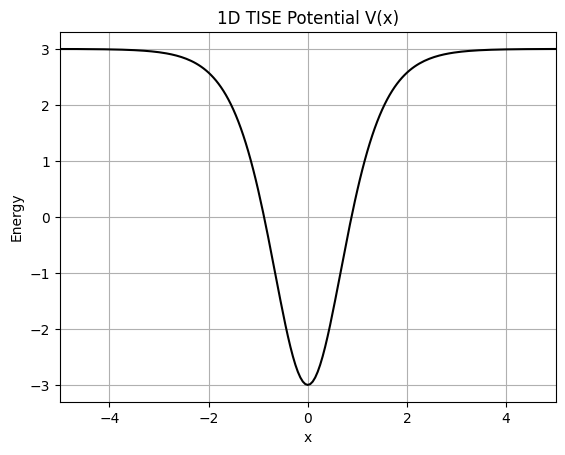

In [34]:
# Potential Function
def V(x):
    """ Potential V(x) as given in the problem """
    coeff = (hbar**2 / (2 * m)) * alpha**2 * lmbda * (lmbda - 1)
    return coeff * (0.5 - 1 / (np.cosh(alpha * x)**2))

# Plotting the potential function
plt.plot(x, V(x), color="black")

# Axes labels
plt.xlabel("x")
plt.ylabel("Energy")

# Axis limits
plt.xlim(-5, 5)

# Plot title
plt.title("1D TISE Potential V(x)")

plt.grid()
plt.show()

<h1>How do we solve the 1D TISE?

The 1D TISE equation shown at the start of this notebook can be re-written in the form of *$ψ''(x)$*:

<h2>$ψ''(x)+\frac{2m}{\hbar^{2}}[E - V(x)]ψ(x) = 0$


<br><br>

Which is in the same form as the Sturm-Liouville problem - whereby it can be solved using any linear shooting method, with the parameters:



*   *$p(x) = 1$*
*   *$q(x) = 2m[E - V(x)]/ħ^{2}$*
*   *$r(x) = 0$*



<br><br>

However, instead of using any normal shooting method in our code - we shall be using Numerov's method. This method is a numerical technique used to solve second-order differential equations, particularly the Schrodinger equation in quantum mechanics. It is also especially useful for solving the TISE for 1D potentials, such as the case presented in this notebook.

<br><br>

**Numerov's Method**

Numerov's method approximates the solution to the 1D TISE by discretising the spatial variable and iteratively solving the equation at each point, using a predictor-corrector approach to improve the accuracy of the solution.

<br><br>

Re-arranging the equation above, we can write it as:


<h2>$\frac{d^{2}ψ(x)}{dx^{2}} = \frac{2m}{ħ^{2}}[V(x) - E]ψ(x)$



<br><br>

And let:

<h3>$g(x) = \frac{2m}{\hbar^{2}}[V(x) - E]$

<br><br>

Thus, the Schrodinger Equation becomes:

<h3>$\frac{d^{2}ψ(x)}{dx^{2}} = g(x)ψ(x)$

<br><br>

This form is suitable for Numerov's method

<br><br>

**Discretisation in Numerov's Method**

Numerov's Method approximates the wavefunction $ψ(x)$ at discrete points $x_{i} = x_{0} + ih$, where $h$ is the iteration step size. It uses the following recurrence relation:

<h2>$ψ_{i+1} = \frac{2(1-\frac{5}{12}h^{2}g_{i})ψ_{i} - (1+\frac{1}{12}h^{2}g_{i-1})ψ_{i-1}}{1+\frac{1}{12}h^{2}g_{i+1}}$

<br><br>

Where:


*   $ψ_{i+1}, ψ_{i}, ψ_{i-1}$ are the wavefunction values at $x_{i+1}, x_{i}, x_{i-1}$ respectively
*   $g_{i} = g(x_{i}) = \frac{2m}{\hbar^{2}}[V(x_{i}) - E]$


<br><br>

This relation uses information from the 2 previous points $(ψ_{i}, ψ_{i-1})$ to calculate $ψ_{i+1}$

<br><br>

From this, we define the following function in Python for the implementation of the Numerov Method

In [35]:
# Numerov Method Implementation
def numerov(psi0, psi1, E, x, h):
    """ Numerov method to integrate wavefunction for a given energy E. """
    N = len(x)
    psi = np.zeros(N)
    psi[0], psi[1] = psi0, psi1

    # The f variable here essentially represents the g(x) formula described above
    f = lambda xi: 2 * m / hbar**2 * (E - V(xi))

    for i in range(1, N - 1):
        k0 = f(x[i - 1])
        k1 = f(x[i])
        k2 = f(x[i + 1])

        psi[i + 1] = (2 * (1 - 5 * h**2 * k1 / 12) * psi[i] - (1 + h**2 * k0 / 12) * psi[i - 1]) / (1 + h**2 * k2 / 12)

    return psi

<h1>The Eigenvalue Problem

As visualised earlier, the particle in question is confined within potential well $V(X)$ so that $ψ(x)→0$ with $|x|→∞$

<br><br>

In order to solve this eigenvalue problem, we must integrate the equation using Numerov's method either from left to right, or from right to left in the potential region.

<br><br>

Knowing that the wavefunction approaches zero as the magnitude of x approaches infinity - integrating from one side of the potential to the other involves integrating from an exponentially increasing region to an oscillatory region, and then into an exponentially decreasing region.

<br><br>

Hence, to solve this issue and reduce errors when integrating, we must integrate and obtain the solutions from both sides and match them within the well region. Matching occurs when the energy of the energy level equals to that of the potential $V(x)$ i.e. at x-values $x_{l}$ and $x_{r}$.

<br><br>

This matching is required to adjust the trial eigenvalue until the solution integrated from the right, $ψ_{r}(x)$, and the solution integrated from the left, $ψ_{l}(x)$, satisfy the boundary conditions at one of the turning points.

<br><br>

Selecting the turning point, the continuity conditions are:

*   $ψ_{l}(x_{r}) = ψ_{r}(x_{r})$
*   $ψ_{l}'(x_{r}) = ψ_{r}'(x_{r})$

<br><br>

Combining the 2 conditions, we get:

<h2>$\frac{ψ_{l}'(x_{r})}{ψ_{l}(x_{r})}=\frac{ψ_{r}'(x_{r})}{ψ_{r}(x_{r})}$

<br><br>

Using the three point formula for the first-order, we then have:

<h2>$f(E)=\frac{[ψ_{l}(x_{r}+h)-ψ_{l}(x_{r}-h)]-[ψ_{r}(x_{r}+h)-ψ_{r}(x_{r}-h)]}{2hψ(x_{r})}=0$

<br><br>

Note that in the code below, we split the three point formula into 2 parts:

*   <h2>ratio_left $=\frac{[ψ_{l}(x_{r}+h)-ψ_{l}(x_{r}-h)]}{2hψ(x_{r})}$
*   <h2>ratio_right $=\frac{[ψ_{r}(x_{r}+h)-ψ_{r}(x_{r}-h)]}{2hψ(x_{r})}$

<br><br>

Also take note that in the code below that we use $[x_{r}±1]$ instead of the original $(x_{r}±h)$ in the original formula, since psi in our code is a NumPy array obtained from the numerov() function, which holds values for the wavefunction at various steps of $x$ (with step size $h$).

In essence, $[x_{r}±1]$ refers to the next and previous x-values in the psi array, which are already differentiated by step size $h$ - and is therefore equivalent to $(x_{r}±h)$

In [36]:
# Matching Condition
def matching_condition(E, x, h):
    """ Compute the matching condition at the turning point. """
    N = len(x)

    # Integrate from left
    psi_left = numerov(0.0, 1e-5, E, x, h)

    # Integrate from right
    psi_right = numerov(0.0, 1e-5, E, x[::-1], h)[::-1]

    # Match at the midpoint
    x_match = N // 2

    # Defining the 2 parts of the three point formula
    ratio_left = (psi_left[x_match + 1] - psi_left[x_match - 1]) / (2 * h * psi_left[x_match])
    ratio_right = (psi_right[x_match + 1] - psi_right[x_match - 1]) / (2 * h * psi_right[x_match])

    # Returning the value of the three point formula
    return ratio_left - ratio_right

<h1>Root-Finding for Eigenvalues

We now move on to searching for the Eigenvalues using root-finding methods

For this section, we need to re-visualise our potential $V(x)$ function again. Recall that the eigenvalues represent the different discrete energy levels that can be found within the potential well.

Also recall that each of the wavefunctions representing these discrete energy levels can be found in specific energy value ranges (See the plot below).

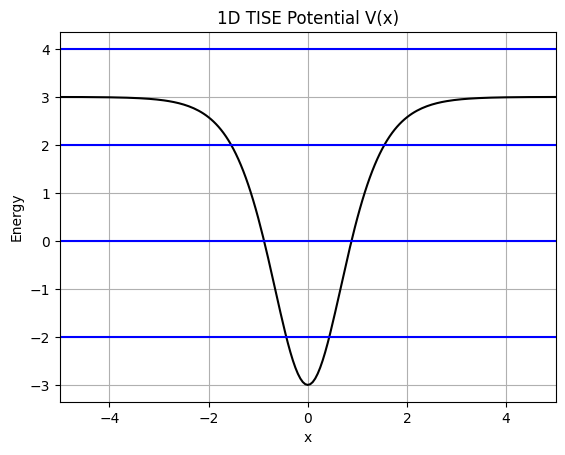

In [37]:
plt.plot(x, V(x), color="black")

plt.plot([-5, 5], [-2, -2], color="blue")
plt.plot([-5, 5], [0, 0], color="blue")
plt.plot([-5, 5], [2, 2], color="blue")
plt.plot([-5, 5], [4, 4], color="blue")

# Axes labels
plt.xlabel("x")
plt.ylabel("Energy")

# Axis limits
plt.xlim(-5, 5)

# Plot title
plt.title("1D TISE Potential V(x)")

plt.grid()
plt.show()

Note that in the visualisation above, we are roughly splitting the potential well into 3 different regions where each of the first 3 energy levels $E_{0}, E_{1}, E_{2}$ are estimated to be found.

Hence, in the code below, we look through each of these energy value ranges - iterating through them and calculating the product of the matching conditions between 2 adjacent energies in the range.

Once the code detects that the product of the matching conditions for 2 adjacent energies < 0, which indicates that there is a root within this range (due to the sign change of the matching condition in that interval) - it will then move on to calculating the roots of the function.

<br><br>

Now, at this stage we can opt for the traditional numerical methods to find the roots of a scalar function (Newton method, Secant method, Bisection method).

However, in this code, we use the **scipy.optimize.root_scalar()** function, and selecting the 'brentq' method. This means that the function will use Brent's method in order to solve for the roots.

One reason why this was chosen instead of the traditional methods is because Brent's method is considered a very reliable and robust root-finding method that already combines the bisection method, secant method, and inverse quadratic interpolation - taking advantage of the best features of each method.

In [38]:
# Root-Finding for Eigenvalues
def find_eigenvalues(x, h, n_levels=3):
    """ Find the first n_levels eigenvalues using root-finding. """
    eigenvalues = []

    # Initial guess range for energy
    E_start = -2
    E_end = 0
    dE = 2

    for n in range(n_levels):
        energies = np.linspace(E_start, E_end, 100)

        for i in range(len(energies) - 1):
            E1, E2 = energies[i], energies[i + 1]

            if matching_condition(E1, x, h) * matching_condition(E2, x, h) < 0:
                result = root_scalar(matching_condition, args=(x, h), bracket=[E1, E2], method='brentq')
                eigenvalues.append(result.root)
                break

        E_start += dE
        E_end += dE

    return eigenvalues

<h1>Solving the Eigenvalue Problem for 1D TISE using Python

Alright, we have now gone through all the theory and set up all of the functions required to solve the 1D TISE in Python. Let's now put all of those functions to use.

Note that we can only solve up to the first 3 eigenvalues (energy levels).

Also take note that the method used in the code below to find the intersection points between each wavefunction and the main potential function is not always perfect (especially for $E_{0}$) - but it works well for $E_{1}$ and $E_{2}$

Numerically solved Eigenvalues:
E_0 = -1.500001
E_1 = 0.999998
E_2 = 2.499998

Exact Eigenvalues:
E_0 = -1.500000
E_1 = 1.000000
E_2 = 2.500000

For E_0, wavefunction intersects at (-0.6999999999998678, -0.8084375398953605) and (0.6500000000001513, -1.039160699256747)


For E_1, wavefunction intersects at (-1.349999999999877, 1.5838149003857303) and (0.9000000000001549, 0.07849583311059882)


For E_2, wavefunction intersects at (-2.6999999999998963, 2.8925746394734966) and (2.6500000000001798, 2.881388819245819)



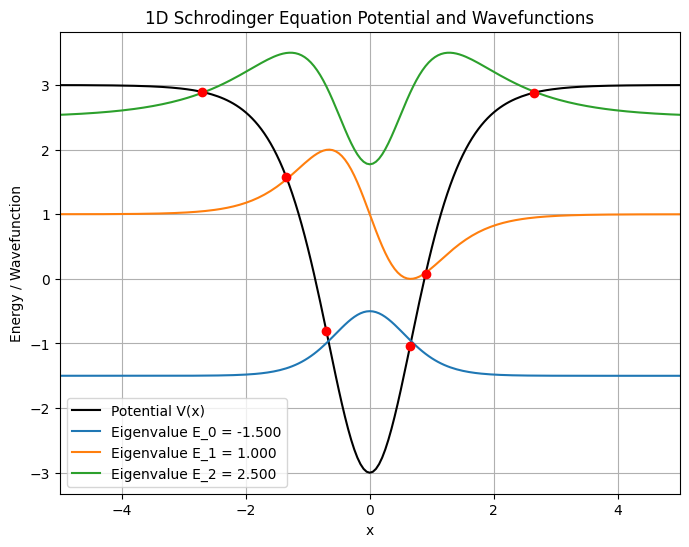

In [39]:
# Find the first 3 eigenvalues
n_levels = 3
eigenvalues = find_eigenvalues(x, h, n_levels=n_levels)

# Print results
print("Numerically solved Eigenvalues:")
for i, E in enumerate(eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Exact Eigenvalues for Comparison
exact_eigenvalues = [(hbar**2 / (2 * m)) * alpha**2 * (lmbda * (lmbda - 1) / 2 - (lmbda - 1 - n)**2) for n in range(n_levels)]
print("\nExact Eigenvalues:")
for i, E in enumerate(exact_eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Plot Potential and Wavefunctions
plt.figure(figsize=(8, 6))

# List of intersection points for each energy curve
intersect_points = []
y_val = []

v = V(x)
plt.plot(x, v, label="Potential V(x)", color='black')


for i, E in enumerate(eigenvalues):
    psi = numerov(0.0, 1e-5, E, x, h)
    y = psi / np.max(np.abs(psi)) + E
    plt.plot(x, y, label=f"Eigenvalue E_{i} = {E:.3f}")

    idx = np.argwhere(np.diff(np.sign(v - y))).flatten()
    plt.plot(x[idx], v[idx], 'ro')

    print(f"\nFor E_{i}, wavefunction intersects at ({x[idx].tolist()[0]}, {v[idx].tolist()[0]}) and ({x[idx].tolist()[1]}, {v[idx].tolist()[1]})\n")

# Axes labels
plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")

# Axis limits
plt.xlim(-5, 5)

# Plot title
plt.title("1D Schrodinger Equation Potential and Wavefunctions")

plt.legend()
plt.grid()
plt.show()